In [39]:
!pip install numpy pandas matplotlib scikit-learn &> /dev/null

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from PIL import Image

# Problem 1

In [41]:
X, y = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.6, random_state=0)

Display the clusters

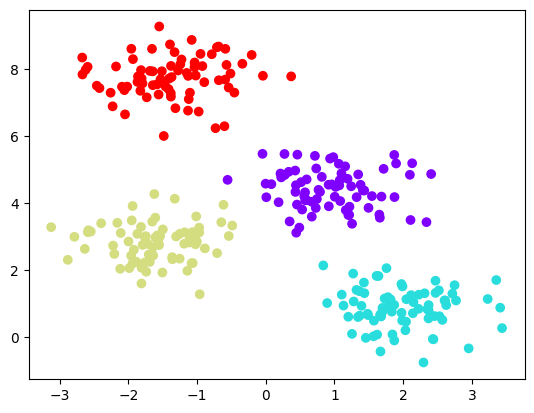

In [42]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')

### K-means clustering

In [43]:
class KMeans:
    def __init__(self, n_clusters, n_features):
        self.n_clusters = n_clusters
        self.n_features = n_features
    
    def distances(self, X):
        assert X.shape[1] == self.n_features
        distances = []
        for centroid in self.centroids:
            distances.append(np.linalg.norm(X - centroid, axis=1))
        return np.array(distances)
    
    def initializeRandomCentroids(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
    def initializeKMeansPlusPlusCentroids(self, X):
        self.centroids = np.zeros((self.n_clusters, self.n_features))
        self.centroids[0] = X[np.random.choice(X.shape[0], 1, replace=False)]
        for i in range(1, self.n_clusters):
            distances = []
            for centroid in self.centroids[:i]:
                distances.append(np.linalg.norm(X - centroid, axis=1))
            distances = np.array(distances)
            distances = np.min(distances, axis=0)
            distances = distances / np.sum(distances)
            self.centroids[i] = X[np.random.choice(X.shape[0], 1, replace=False, p=distances)]     
    
    def whichCluster(self, X):
        distances = self.distances(X)
        return np.argmin(distances, axis=0)
    
    def updateCluster(self, X):
        clusters = self.whichCluster(X)
        for i in range(self.n_clusters):
            self.centroids[i] = np.mean(X[clusters == i], axis=0)
    
    def fit(self, X, epochs=500, seed=None, kmeansPlusPlus=False):
        if seed is not None:
            np.random.seed(seed)
        else:
            np.random.seed(np.random.randint(0, 1000))
        if kmeansPlusPlus:
            self.initializeKMeansPlusPlusCentroids(X)
        else:
            self.initializeRandomCentroids(X)
        for _ in range(epochs):
            self.updateCluster(X)
    
    def predict(self, X):
        return self.whichCluster(X)
    
    def plot(self, X):
        clusters = self.whichCluster(X)
        plt.scatter(X[:,0], X[:,1], c=clusters, cmap='rainbow')
        plt.scatter(self.centroids[:,0], self.centroids[:,1], c='black', s=100, alpha=0.5)

#### K-Means with default seed

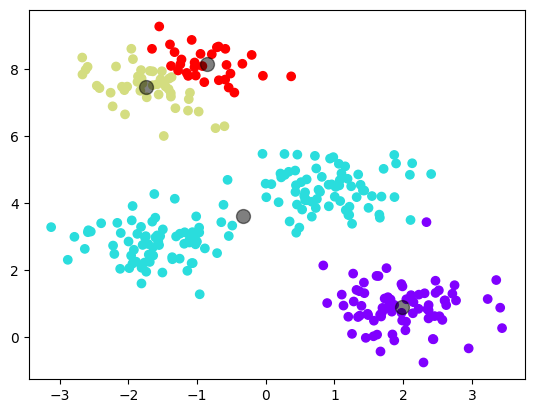

In [44]:
kmeans = KMeans(n_clusters=4, n_features=2)
kmeans.fit(X)   
kmeans.plot(X)

In [45]:
labels = kmeans.predict(X)
print("Centers: ", kmeans.centroids)

Centers:  [[ 1.98726097  0.90144281]
 [-0.33514647  3.62624134]
 [-1.73612968  7.46038138]
 [-0.85818041  8.16999589]]


#### K-Means with seed=2

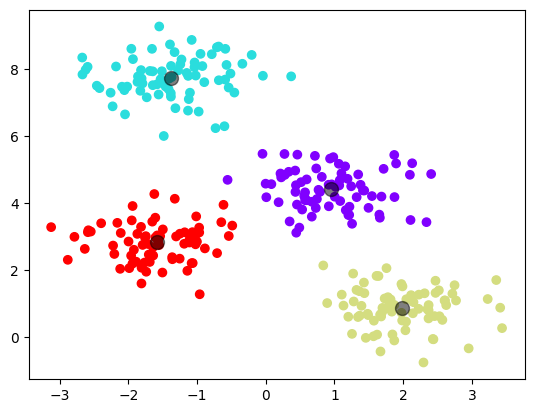

In [58]:
kmeans = KMeans(n_clusters=4, n_features=2)
kmeans.fit(X, seed=2)  
kmeans.plot(X)

In [47]:
labels = kmeans.predict(X)
print("Centers: ", kmeans.centroids)

Centers:  [[ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]]


#### Observations
1. The clusters are different for different seeds
2. With seed=2, the clusters are more accurate than the default seed
3. The default seed may or may not give the best clusters

### K-Means++

#### K-Means++ with default seed

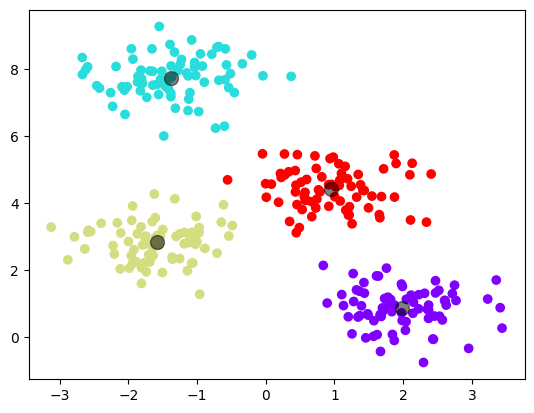

In [48]:
kmeansPlusPlus = KMeans(n_clusters=4, n_features=2)
kmeansPlusPlus.fit(X, kmeansPlusPlus=True)
kmeansPlusPlus.plot(X)

In [49]:
labels = kmeansPlusPlus.predict(X)
print("Centers: ", kmeansPlusPlus.centroids)

Centers:  [[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]


#### K-Means++ with seed=2

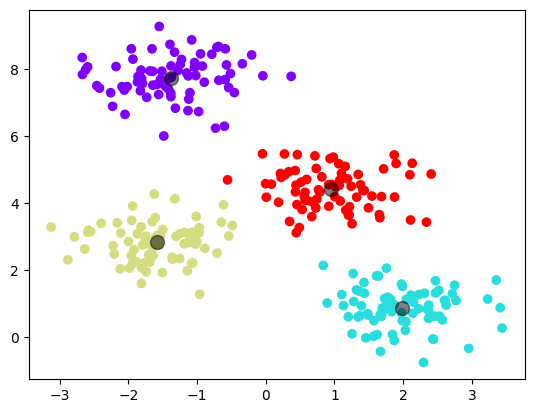

In [50]:
kmeansPlusPlus = KMeans(n_clusters=4, n_features=2)
kmeansPlusPlus.fit(X, seed=2, kmeansPlusPlus=True)
kmeansPlusPlus.plot(X)

In [51]:
labels = kmeansPlusPlus.predict(X)
print("Centers: ", kmeansPlusPlus.centroids)

Centers:  [[-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]


#### Observations
1. Seeding doesn't seem to affect the clusters much in K-Means++
2. The centroids seem to stabilize in K-Means++ faster.

### K-Means++ for image compression

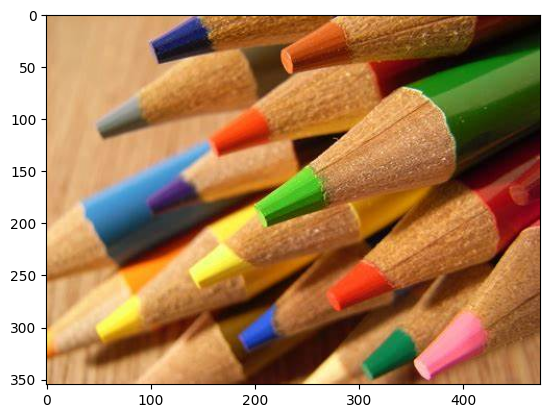

In [69]:
image = Image.open('OIP.jpeg')

imageArray = np.array(image)
height, width, channels = imageArray.shape

flattenedImageArray = imageArray.reshape(height * width, channels)
plt.imshow(imageArray)

In [74]:
kmeansPlusPlus = KMeans(n_clusters=16, n_features=channels)
kmeansPlusPlus.fit(flattenedImageArray, kmeansPlusPlus=True)

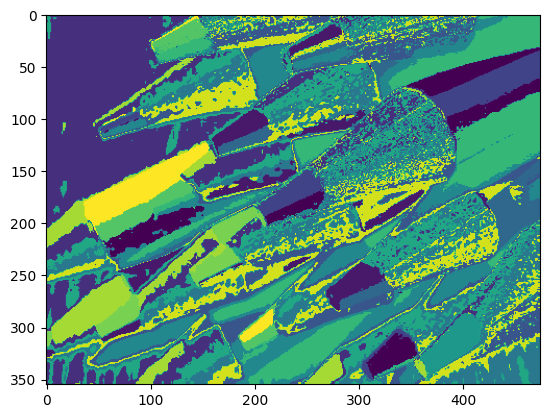

In [75]:
newImageArray = kmeansPlusPlus.predict(flattenedImageArray)
newImageArray = newImageArray.reshape(height, width)

plt.imshow(newImageArray)

#### Overall observations
1. K-Means++ and K-Means with seed=2 have very similar results
2. K-Means with default seed has a different result and is not as good as the others. The result fluctuates a lot and is not as stable as the others.
3. K-Means++ seem to perform better than K-Means in general.
4. For the image compression, K-Means++ with 16 clusters seems to be the best, in terms of time and quality of the compressed image.